<a href="https://colab.research.google.com/github/Sibun20/Twitter_Sentiment_Analysis/blob/main/Twitter_Sentimant_Analysis_FInal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# *Importing Twitter Sentiment dataset*

In [ ]:
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
  0% 0.00/80.9M [00:00<?, ?B/s]
100% 80.9M/80.9M [00:00<00:00, 1.15GB/s]


Extracting the compressed ***file***

In [ ]:
from zipfile import ZipFile
dataset = '/content/sentiment140.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
import re
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))  # it remove this words and it doesnot make any sense or meaning to the sentence

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

# Data ***Processing*** **bold text**

In [ ]:
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding = 'ISO-8859-1',names=['Target','ID','Date','Flag','User','Text'])

In [ ]:
twitter_data.shape

(1600000, 6)

In [ ]:
df=pd.DataFrame(twitter_data)
df.head()

,Target,ID,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1600000 non-null  int64 
 1   ID      1600000 non-null  int64 
 2   Date    1600000 non-null  object
 3   Flag    1600000 non-null  object
 4   User    1600000 non-null  object
 5   Text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
df.describe()

,Target,ID
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [ ]:
# Printing the number of missing values in each column

In [ ]:
df.isna().sum()

,0
Target,0
ID,0
Date,0
Flag,0
User,0
Text,0


In [ ]:
#checking the distribution of target column

In [ ]:
print(df['Target'].value_counts())  # 0 for negative tweet and 4 means positive tweet

Target
0    800000
4    800000
Name: count, dtype: int64


In [ ]:
# convert "4 to "1
df.replace({'Target':{4:1}},inplace=True)

In [ ]:
print(df['Target'].value_counts())

Target
0    800000
1    800000
Name: count, dtype: int64


***Stemming***

In [ ]:
# Stemming is a process of reducing a word to its root word in order to reduce the dimension of the model so that it cannot undergo to overfit

In [ ]:
port_stem = PorterStemmer()

In [ ]:

def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [ ]:
df['stemmed_content'] = df['Text'].apply(stemming)

In [ ]:
df.head()


,Target,ID,Date,Flag,User,Text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [ ]:
df['stemmed_content']

,stemmed_content
0,switchfoot http twitpic com zl awww bummer sho...
1,upset updat facebook text might cri result sch...
2,kenichan dive mani time ball manag save rest g...
3,whole bodi feel itchi like fire
4,nationwideclass behav mad see
...,...
1599995,woke school best feel ever
1599996,thewdb com cool hear old walt interview http b...
1599997,readi mojo makeov ask detail
1599998,happi th birthday boo alll time tupac amaru sh...


In [ ]:
print(df['Target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: Target, Length: 1600000, dtype: int64


**Separating the data and label**

In [ ]:

X=df['stemmed_content'].values
Y=df['Target'].values

In [ ]:
print(X)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [ ]:
print(Y)

[0 0 0 ... 1 1 1]


**# Split the data into training and testing**

In [ ]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=20)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1600000,) (1280000,) (320000,)


In [ ]:
print(X_train)

['superkevo yeah hotel expens'
 'robwinmar let know need hand give quot mate rate quot p'
 'balaarjunan vasanthgvk vkhater anand iyer kevalprabhu would love reserv boost setter posit'
 ... 'forgot coffe car'
 'finish play keyboard marin award strongli dislik play keyboard back wrench bench sit'
 'chrysler restart viper plant time time midlif crisi']


In [ ]:
print(X_test)

['deanhatescoffe problem googl' 'want new gg episod alreadi'
 'jaffn philbradley blimey today day health check optician appt morn sorri hear loss molar'
 ... 'glad got moment alarm clock went prop' 'work'
 'time css xhtml code yea']


***Converting the textual data to numeric data ***

In [ ]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


**Logistic Regression**

In [ ]:

model=LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)


LogisticRegression(max_iter=1000)

**Model Evaluation**

In [ ]:
# Accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)

In [ ]:
print("Accuracy score on training data : " ,training_data_accuracy)

Accuracy score on training data :  0.7991171875


In [ ]:
# Accuracy score on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)

In [ ]:
print("Accuracy score on test data : " ,test_data_accuracy)

Accuracy score on test data :  0.7775625


Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.76      0.77    160000
    Positive       0.77      0.80      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



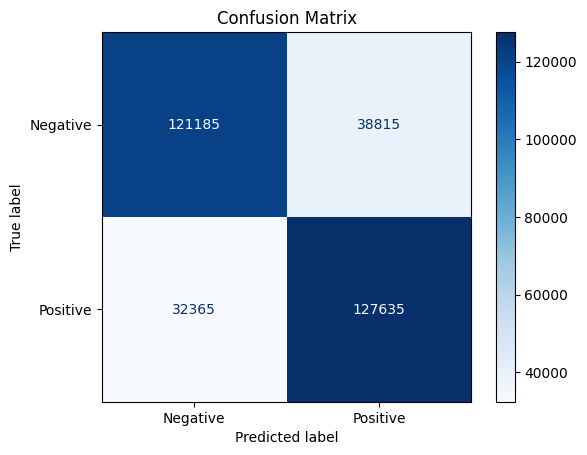

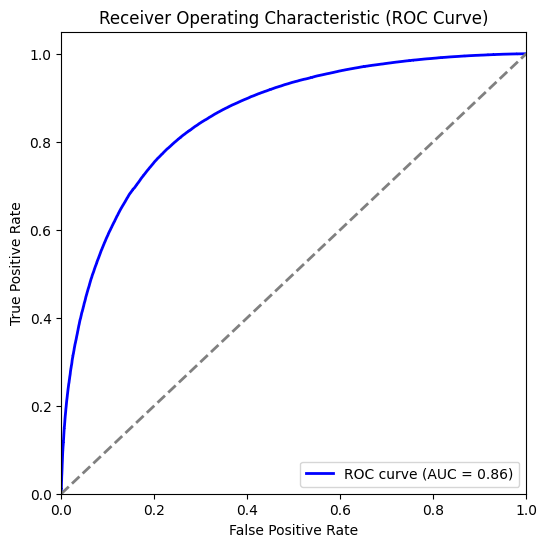

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, X_test_prediction, target_names=["Negative", "Positive"]))

# Confusion Matrix
cm = confusion_matrix(Y_test, X_test_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC Curve)")
plt.legend(loc="lower right")
plt.show()


**Saving the trained Model**

In [ ]:
import pickle


In [ ]:
filename='trained_model.sav'
pickle.dump(model,open(filename,'wb'))

**using the saved model for future prediction**

In [ ]:
# loading the saved model
loaded_model=pickle.load(open('/content/trained_model.sav','rb'))

In [ ]:
X_new=X_test[200]
print(Y_test[200])

prediction = model.predict(X_new)
print(prediction)

if(prediction[0] ==0):
  print("Negative Tweet")
else:
  print("Positive Tweet")

0
[1]
Positive Tweet
